# Final Project

## Title: Automatic Maze Generation with Various Algorithms

### Author: Vinny Sun

##### Permission to share ✅

Though the terms labyrinth and maze are generally synonymous in English today, many scholars will differentiate them with the fact labyrinths have no branching paths (they are [unicursal](https://www.oed.com/dictionary/unicursal_adj?tab=meaning_and_use&tl=true)) while mazes have branching paths (they are multicursal). [Labyrinths](https://en.wikipedia.org/wiki/Labyrinth) in particular have over 3000 years of history. However, since they have no branching, they don't make for a very interesting 2D puzzle. On the other hand, [mazes](http://www.unmuseum.org/maze.htm) have a shorter history but are much more interesting as a 2D puzzle. Both labyrinths and mazes can be generated algorithmically in many ways.

Inspiration for the ideas and algorithms come from [here](https://weblog.jamisbuck.org/2011/2/7/maze-generation-algorithm-recap), [here](https://en.wikipedia.org/wiki/Maze_generation_algorithm), and [here](https://professor-l.github.io/maze) with ideas for the implementation coming from [here](https://medium.com/@msgold/using-python-to-create-and-solve-mazes-672285723c96).


---
We start by (optionally downloading and) importing necessary packages

In [ ]:
%pip install matplotlib
%pip install numpy

In [604]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np
from IPython.display import HTML

--- 

First, we'll take a brief look at how to visualze a matrix. 

In [3]:
def draw(maze, figsize=10):
    plt.figure(figsize=(figsize, figsize))

    plt.imshow(maze, cmap='binary')
    
    plt.axis('off')
    plt.show()

In this notebook, we will denote walls with 1 and empty cells with 0 (this makes drawing easier). The drawing function (above) will take a matrix (2d array) of these 1s and 0s and show the corresponding image. For example, given the matrix

$$\begin{matrix}
    1 & 1 & 1 \\
    0 & 0 & 0 \\
    1 & 1 & 1
\end{matrix}$$

the corresponding image would be

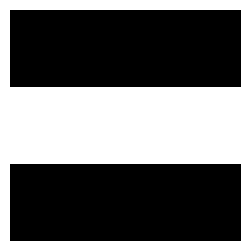

In [4]:
matrix = np.array(
    [[1, 1, 1], 
     [0, 0, 0], 
     [1, 1, 1]])
draw(matrix, figsize=3)

Here, there are two rows of walls on the top and bottom and a row of empty cells acorss the middle. Of course, this isn't a very interesting puzzle.

---

### Exercise 1

For our algorithms, we will always start with a full matrix of ones (grid of walls). We can begin by just removing some random subset of walls (of course there is little chance this is actually a maze / labyrinth). Fill in the blanks to generate this random matirx.  


In [5]:
def random_removal(size, seed=None):
    """generates a random matrix of ones and zeros

    Args:
        size (int): size of a dimension of the matrix
        seed (int, optional): seed for random generation. Defaults to None.

    Returns:
        2d numpy array: matrix of 1 and 0
    """

    np.random.seed(seed)

    matrix = np.ones((size, size)) # initialize a grid of walls

    for i in range(____): # loop through rows
        for j in range(____): # loop thrgouh columns
            if np.random.random() > ____: # 50 % chance of creating an empty cell
                matrix[i, j] = ____ # make the cell empty
    
    return matrix

If done properly, the drawn matrix below will look like

<img src="./random matrix.png" alt="random matrix" width="200"/>

In [6]:
draw(random_removal(10, 0), 3)

NameError: name '____' is not defined

Of course, there are more elegant solutions. One is below. (It won't generate the same matrix)

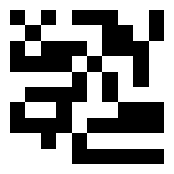

In [441]:
draw(np.random.randint(2, size=(10, 10)), figsize=2)

Now we create a maze. We will define a maze as a matrix of cells with two types of entries - empty and wall - such that there is a path (of empty cells) from an entrance to an exit and the path contains some unused branches (so it isn't a labyrinth). It would also be nice if this maze was interesting enough to be "fun" for the maze solver.

---

As seen above, we can't just remove walls anywhere. For example, we can't have four adjacent empty cells in a 2x2 grid, and all paths must be separated a wall with thickness exactly one. To create a valid maze, we actually need to work with a larger grid. Given a size, we will make a grid of $(\text{size}*2+1, \ \text{size}*2+1)$.

If we visualize the $(\text{size}, \text{size})$ grid with walls of thickness 0 like below,

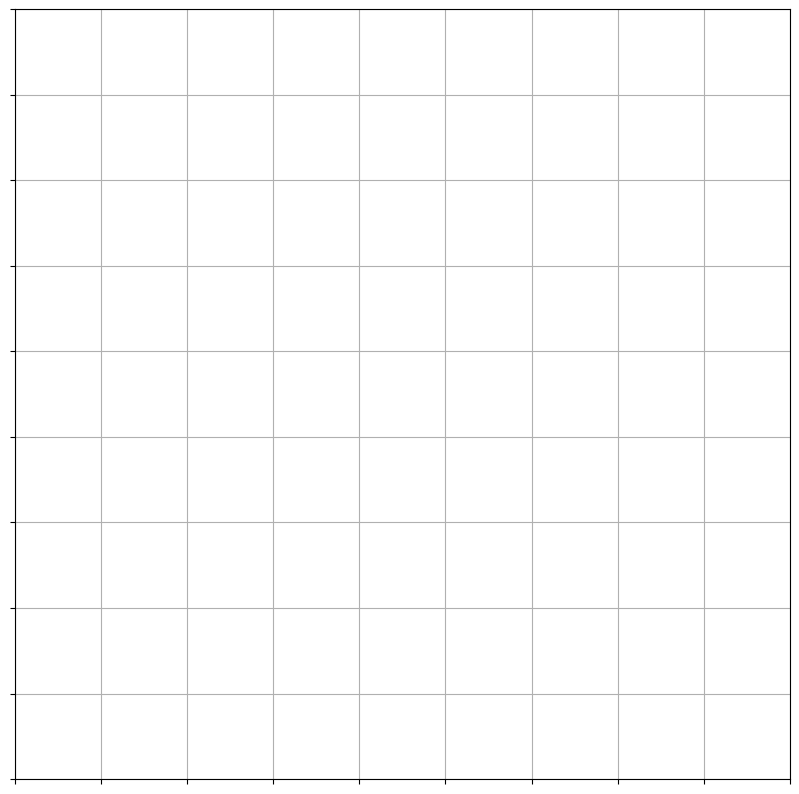

In [455]:
plt.figure(figsize=(10, 10))
plt.grid(True)
plt.xticks(range(10), labels=[''] * 10)
plt.yticks(range(10), labels=[''] * 10)
plt.show()


the we can visualize the $(\text{size}*2+1, \text{size}*2+1)$ grid as having walls of thickness 1.

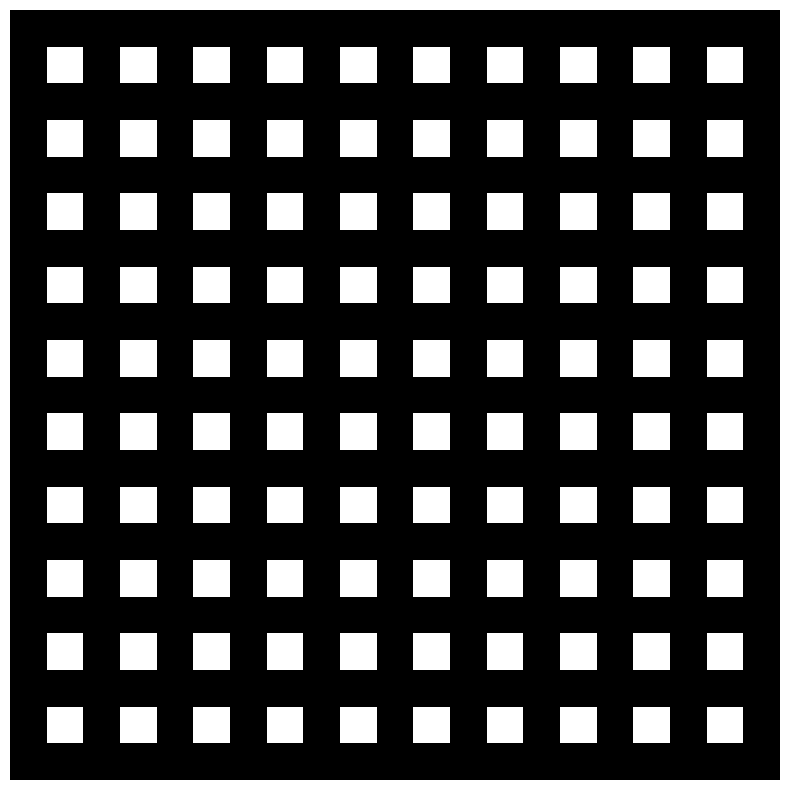

In [459]:
grid = np.ones((21, 21))

for x in range(1, grid.shape[0] - 1, 2):
    for y in range(1, grid.shape[1] - 1, 2):
        grid[x, y] = 0

draw(grid)

We need our function to return the above grid with walls removed to create a valid maze that can be drawn with our existing drawing function (drawing 1-thick walls is much easier than drawing 0-thick walls)

To start, we'll initialize the $(\text{size}*2+1, \text{size}*2+1)$ grid to all ones. We'll create the maze by *backtracking*. This algorithm continously extends the maze in a random valid direction until it reaches an unextendable point. Then, it will backtrack to a previously visited point in the maze and try to extend in a different direction than previously. When the algorithm terminates, we will have a fully filled maze, and we'll just need to remove two walls for the entrace and exit. 

Try to understand the below code (the stack data structure is explained after)

In [507]:
def backtracking(size):
    """Creates a maze of size*2+1 by size*2+1 through backtracking
        (not size by size since we need 1-thick walls, not 0-thick walls)

    Args:
        size (int): size of grid

    Returns:
        2d numpy array: maze to draw
    """

    # create the matrix of ones
    maze = np.ones((size*2+1, size*2+1))

    # starting location
    x, y = (0, 0)

    # set starting location in the maze empty cell
    maze[2*x+1, 2*y+1] = 0

    # initialize the stack of cells to check
    stack = [(x, y)]

    # while the stack is not empty
    while stack:
        # get the top item in the stack
        x, y = stack[-1]

        # initialize the list of possible directions (up, down, left, right)
        directions = [(1, 0), (-1, 0), (0, -1), (0, 1)]

        # shuffle the above directions list to have the maze generate in random directions
        np.random.shuffle(directions)

        # loop through the four directions
        for dx, dy in directions:

            # the next cells to check
            nx, ny = x + dx, y + dy

            # if the next cell is valid
            if nx >= 0 and ny >= 0 and nx < size and ny < size and maze[2*nx+1, 2*ny+1] == 1:
                # set the next cell to empty
                maze[2*nx+1, 2*ny+1] = 0
                # set the wall between current cell and next cell to empty
                maze[2*x+1+dx, 2*y+1+dy] = 0
                # push the next cell on the stack
                stack.append((nx, ny))
                break
        else:
            # if no valid cells to move to, remove the cell from the stack
            stack.pop()

    # create entrance and exit    
    maze[0, 1] = 0
    maze[-1, -2] = 0

    return maze

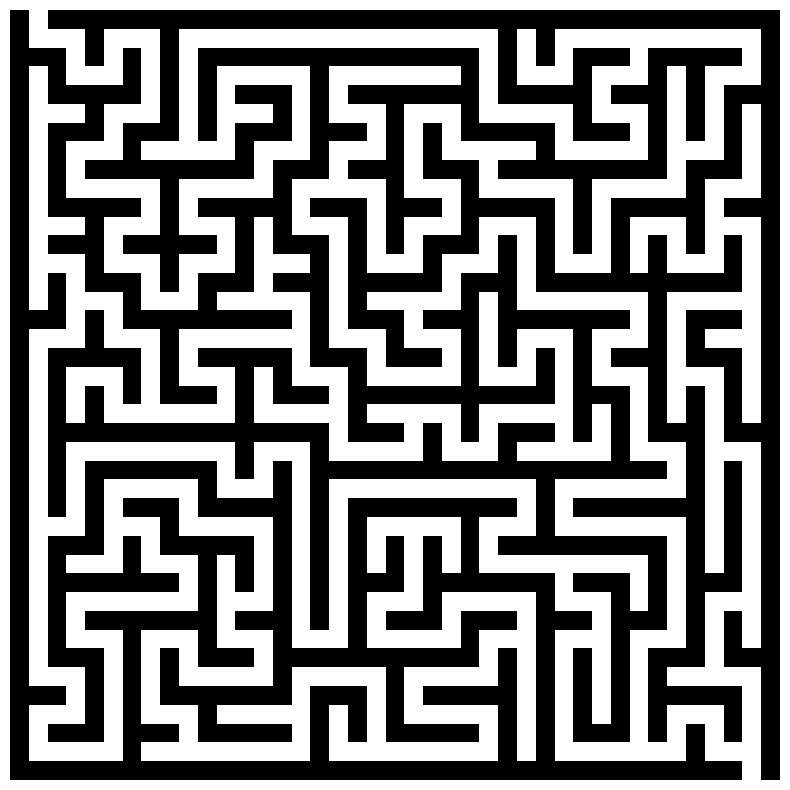

In [508]:
draw(backtracking(20))

The above algorithm uses a data structure called a *stack* (implemented with a python list) to keep track of the nodes that can still be expanded (at least one of the 4 directions is still free). A stack has *last-in-first-out* (LIFO) structure, where elements inserted last will be accessed first. You can think of this like a stack of trays. As you put new trays on top of the stack, these newer trays will be taken first. In stack terminology, you add items by *pushing* them and you remove items by *popping* them. 

(also side note, if the (x,y) and row/column are confusing, see [this](https://stackoverflow.com/questions/2203525/are-the-x-y-and-row-col-attributes-of-a-two-dimensional-array-backwards))

Here is a visualization of the algorithm on a smaller maze to aid in understanding (this could take a while to run)

In [608]:
figsize = 5
size = 7

def image(maze):
    img = plt.imshow(maze, cmap='binary', animated=True)
    plt.axis('off')

    return img

def images(size):
    images = []

    maze = np.ones((size*2+1, size*2+1))

    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    stack = [(x, y)]

    images.append([image(maze)])

    while stack:
        x, y = stack[-1]

        directions = [(1, 0), (-1, 0), (0, -1), (0, 1)]

        np.random.shuffle(directions)

        for dx, dy in directions:

            nx, ny = x + dx, y + dy

            if nx >= 0 and ny >= 0 and nx < size and ny < size and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                images.append([image(maze)])
                break
        else:
            stack.pop()

    maze[0, 1] = 0
    maze[-1, -2] = 0

    images.append([image(maze)])

    return images

fig = plt.figure(figsize=(figsize, figsize))

a = ani.ArtistAnimation(fig, images(size), interval=500)

html = a.to_html5_video()

HTML(html)

<IPython.core.display.Javascript object>

---

### Exercise 2a

What would happen if we removed the line

```python
maze[2*x+1+dx, 2*y+1+dy] = 0
```

### Exercise 2b

What would happen if we removed the line

```python
np.random.shuffle(directions)
```

(observe the order in which the `directions` are defined)

# TODO: Another algorithm? Labyrinths? (hamiltonian path)

---
## Solutions
### Exercise 1
```python
for i in range(matrix.shape[0]): # loop through rows
    for j in range(matrix.shape[1]): # loop thrgouh columns
        if np.random.random() > .5: # 50 % chance of creating an empty cell
            matrix[i, j] = 0 # make the cell empty
```

### Exercise 2a
we would get exactly the grid of empty cells surrounded by 1-thick walls
### Exercise 2b
We would get a vertically zig-zagging labyrinth (for odd numbered sizes)